## First Step

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Price.csv')

In [137]:
#Renaming title of columns
df = df.rename(columns ={'कृषि उपज':'Name','ईकाइ':'Quantity','न्यूनतम':'Min','अधिकतम':'Max','औसत':'Avg'})

df['Avg']=df['Avg'].apply(lambda x: int(x))

In [138]:
import datetime
df['cdate']=pd.to_datetime(df['cdate'])

## Second Step

In [139]:
df.head()

,Name,Quantity,Min,Max,Avg,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,२५,३०,28,2018-02-25,W
2,अालु रातो,के.जी.,२०,२३,22,2018-02-25,W
3,अालु सेतो,के.जी.,१८,२०,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,45,2018-02-25,W


In [140]:
df['Name'].value_counts()

भुर्इ कटहर          1436
मूला सेतो(लोकल)     1436
खु्र्सानी सुकेको    1436
काउली स्थानिय       1436
केरा                1436
                    ... 
अम्बा                 44
अंगुर(कालो)           32
सजिवन                 32
लीच्ची(भारतीय)        28
परवर(तराई)            16
Name: Name, Length: 120, dtype: int64

In [141]:
price=df

In [142]:
vegetable = set(price['Name'].values) #taking all the unique vegetables
len(vegetable)

feature_df = [] #list

for v in vegetable:
    for p_type in ['W','R']:

        df_v = price[(price['Name'] == v) & (price['pricetype']== p_type)] #taking a vegetable of only one pricetype
        df_v = df_v.sort_values(by = ['cdate'], ascending = False) #sorting in descending order based on date. Recent date will be at first.

        if p_type == 'W':
            df_v['type'] = 1
        else:
            df_v['type'] = 0


        df_v['t_1'] = df_v.shift(-1)['Avg']
        df_v['t_2'] = df_v.shift(-2)['Avg']

        feature_df.append(df_v)


In [143]:
feature_df = pd.concat(feature_df)

In [144]:
feature_df.dropna(inplace=True)
feature_df.tail()

,Name,Quantity,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
920,कागती,के.जी.,४५०,५००,475,2018-03-03,R,0,475.0,475.0
786,कागती,के.जी.,४५०,५००,475,2018-03-02,R,0,475.0,475.0
652,कागती,के.जी.,४५०,५००,475,2018-03-01,R,0,475.0,475.0
518,कागती,के.जी.,४५०,५००,475,2018-02-28,R,0,475.0,475.0
384,कागती,के.जी.,४५०,५००,475,2018-02-27,R,0,475.0,475.0


In [146]:
feature_df = feature_df.sample(frac = 1, random_state= 1)

In [148]:
X = feature_df[['type','t_1', 't_2']].values #getting feature matrix
X

array([[  0.,  65.,  65.],
       [  0.,  55.,  55.],
       [  0., 225., 245.],
       ...,
       [  0., 125., 125.],
       [  0., 205., 205.],
       [  0., 215., 225.]])

In [149]:
X.shape

(98822, 3)

In [150]:
X = np.insert(X, 0, values=1, axis = 1) #adding bias or intercept term
X

array([[  1.,   0.,  65.,  65.],
       [  1.,   0.,  55.,  55.],
       [  1.,   0., 225., 245.],
       ...,
       [  1.,   0., 125., 125.],
       [  1.,   0., 205., 205.],
       [  1.,   0., 215., 225.]])

In [151]:
y = feature_df['Avg'].values
print(y.shape)

(98822,)


## Dividing into train, test and validation datas

In [152]:
total = len(X)
train = int(0.6 * total)
val = int(0.2*total)

X_train = X[:train]
y_train = y[:train].reshape(-1,1)

X_val = X[train:train + val]
y_val = y[train:train +val].reshape(-1,1)

X_test = X[train + val:]
y_test = y[train + val:].reshape(-1,1)

print(len(X_train), len(X_val),len(X_test))

59293 19764 19765


## Normalization
Min-max

In [153]:
#To cope with convergence problem during gradient descent, we take all our features into same range. 
X_train 

array([[  1.,   0.,  65.,  65.],
       [  1.,   0.,  55.,  55.],
       [  1.,   0., 225., 245.],
       ...,
       [  1.,   0.,  48.,  48.],
       [  1.,   1.,  53.,  53.],
       [  1.,   1.,  78.,  78.]])

In [154]:
price_X = X_train[:, 1:]

min_v = np.min(price_X)
max_v = np.max(price_X)
diff = max_v - min_v

In [155]:
price_X

array([[  0.,  65.,  65.],
       [  0.,  55.,  55.],
       [  0., 225., 245.],
       ...,
       [  0.,  48.,  48.],
       [  1.,  53.,  53.],
       [  1.,  78.,  78.]])

In [156]:
def min_max_normalization(dataset):
    for i in range(0, dataset.shape[0]):
        for j in range(0, dataset.shape[1]):
            dataset[i][j] = (dataset[i][j]-min_v)/diff

min_max_normalization(X_train)
min_max_normalization(X_val)
min_max_normalization(X_test)

## Regression Model

In [157]:
X_train

array([[0.00061538, 0.        , 0.04      , 0.04      ],
       [0.00061538, 0.        , 0.03384615, 0.03384615],
       [0.00061538, 0.        , 0.13846154, 0.15076923],
       ...,
       [0.00061538, 0.        , 0.02953846, 0.02953846],
       [0.00061538, 0.00061538, 0.03261538, 0.03261538],
       [0.00061538, 0.00061538, 0.048     , 0.048     ]])

In [158]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(59293, 4)
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


## Class ko Solution

In [159]:
np.random.seed(42)
#HyperParameter
#Beautify Code by creating dictionary containing all hyperparameters

train_error=[]

param={
    'num_of_iteration':1000,
    'learning_rate':0.1
}

grid_param={
    'num_of_iteration':[5000,2000],
    'learning_rate':[0.1,0.9]
}

def MSE(h,y):
    return 0.5*np.average((h-y)**2)


In [160]:
#Now a grid is to be created which contains the combination of num_of_iteration and learning_rate. 
#Hyper Parameter Tuning
#This combination is fed to the function and the combination with the best result is our final value of hyperparameters

import itertools
grid=list(itertools.product(grid_param['num_of_iteration'],grid_param['learning_rate']))
print(grid)

for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1]
    }

[(5000, 0.1), (5000, 0.9), (2000, 0.1), (2000, 0.9)]


In [161]:
def train_model(X_train,y_train,X_val,y_val,param):
    np.random.seed(42)
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
    
    train_error=[]
    val_error=[]

    #Run the loop num_of_iteration times 
    for i in range(1,param['num_of_iteration']):
        h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
        train_loss=MSE(h_train,y_train)     #loss in training data is calculated by calling MSE function
        train_error.append(train_loss)      #
        
        #Gradient-- Code form of the formula. shape[0] gives the number of rows
        gradient=np.matmul(np.transpose(h_train-y_train),X_train)/X_train.shape[0]    
            
        #W is the updated weight
        W=W-param['learning_rate']*gradient
    
    #Once training is done. We have to use Val set to tune hyper parameter. 
    #The p(combination) that gives least error is our final value for hyperparameters.
    h_val=np.matmul(X_val,W)
    val_loss=MSE(h_val,y_val)
    val_error.append(val_loss)
    return W, train_error, val_error
# Weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         


{'num_of_iteration': 5000, 'learning_rate': 0.1}
[4413.696116911222]


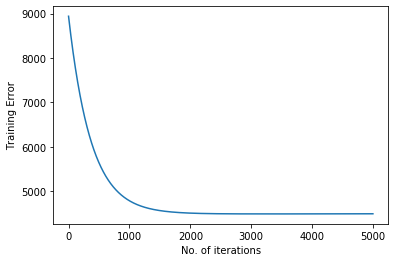

{'num_of_iteration': 5000, 'learning_rate': 0.9}
[6841.919547339142]


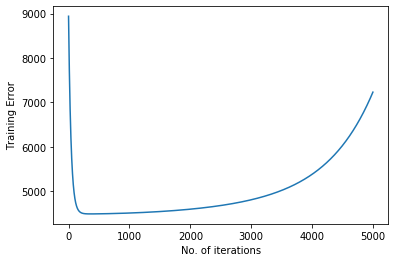

{'num_of_iteration': 2000, 'learning_rate': 0.1}
[4428.0263008156835]


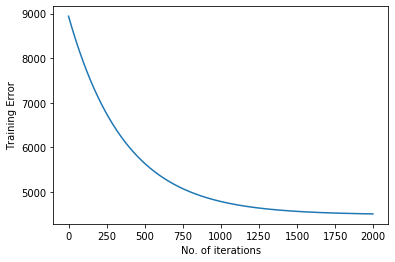

{'num_of_iteration': 2000, 'learning_rate': 0.9}
[4510.329074634642]


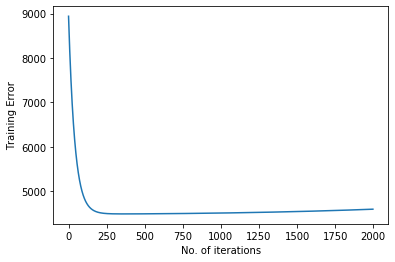

In [162]:
i=0
for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1]
    }
    print(p)
    Weights,train_error,val_error=train_model(X_train,y_train,X_val,y_val,p)
    print(val_error)
    plt.plot(np.arange(len(train_error)),train_error)
    plt.xlabel("No. of iterations")
    plt.ylabel("Training Error")   
    plt.show()

In [163]:
# def grid_search(X_train,y_train,X_val,y_val,grid_param):
#     grid=list(itertools(product))

In [164]:
for param in grid:
    def train_model(X_train,y_train,X_val,y_val,param):
        np.random.seed(42)
        W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
        print(W.shape)
        train_error=[]
        val_error=[]

      #Run the loop num_of_iteration times 
        for i in range(1,param['num_of_iteration']):
            h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
            train_loss=MSE(h_train,y_train)     #loss in training data is calculated by calling MSE function
            train_error.append(train_loss)      #

            #Gradient-- Code form of the formula. shape[0] gives the number of rows
            gradient=np.matmul(X_train.T,(h_train-y_train))/X_train.shape[0]    
            #print(gradient.shape)
            #break   
            #W is the updated weight
            W=W-param['learning_rate']*gradient
            #print(gradient.shape)
            #break
        #Once training is done. We have to use Val set to tune hyper parameter. 
        #The p(combination) that gives least error is our final value for hyperparameters.
        h_val=np.matmul(X_val,W)
        val_loss=MSE(h_val,y_val)
        val_error.append(val_loss)
        return W #train_error, val_error


## March 2nd : R2 score for model evaluation

In [165]:
final_param = {'num_of_iteration' : 5000,'learning_rate': 0.1}
model_weights =  train_model(X_train,y_train,X_val,y_val,final_param)

(4, 1)


In [166]:
model_weights

array([[  5.36269954],
       [  3.1901112 ],
       [818.79151919],
       [798.12657937]])

In [167]:
# weights = np.array(model_weights)
y_mean = np.mean(y_test)
h_test = np.matmul(X_test, model_weights)
n = X_test.shape[0]
k = X_test.shape[1] - 1
SST = np.sum(np.square(y_test - y_mean))
SSR = np.sum(np.square(h_test- y_mean))
SSE = SST - SSR
print(SSE)
R2 = 1 - (SSE/(n-k-1))/(SST/(n-1))
R2

2678791.79102394


0.9808026718015175

In [168]:
X_test.shape,model_weights.shape,h_test.shape

((19765, 4), (4, 1), (19765, 1))

In [169]:
sse = np.sum(np.square(h_test - y_test))
sse

3202070.116557234

In [170]:
# #5000 and 0.1
# SSE= 1100482.76069282

# R2= 0.9912581329676198

# sse= 4699303.15028573